In [4]:
from sklearn.preprocessing import StandardScaler
import utils
import glob
import numpy as np
import pandas as pd
from tqdm import tqdm

In [29]:
def extract_metadata_images(folder="train_images"):
    paths = glob.glob(f"{folder}/**/*.dcm")
    data = []
    for path in tqdm(paths):
        try:
            dcm, image = utils.show_dcm_image(path)
            record = (*dcm.ImageOrientationPatient, dcm.SliceThickness, dcm.InstanceNumber, np.min(image),  np.max(image), np.sum(image), np.mean(image), np.std(image))
            data.append(record)
        except:
            print(path)
            break
    
    return pd.DataFrame(data=data,columns=[f"Orientation_{i}" for i in range(6)] + ["slice_thickness", "slice_number", "min_pixel", "max_pixel", "sum_pixel", "mean_pixel", "std_pixel"])
    

In [30]:
train_image_info = extract_metadata_images()

 69%|██████████████████████████████████████████████████▋                      | 494469/711601 [1:12:25<39:27, 91.70it/s]/opt/conda/miniconda3/envs/spine-kaggle/lib/python3.8/site-packages/pydicom/pixel_data_handlers/pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (12-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(
100%|████████████████████████████████████████████████████████████████████████| 711601/711601 [1:42:23<00:00, 115.83it/s]


In [31]:
train_image_info.to_csv("training_metadata.csv")

In [32]:
train_image_info.head()

,Orientation_0,Orientation_1,Orientation_2,Orientation_3,Orientation_4,Orientation_5,slice_thickness,slice_number,min_pixel,max_pixel,sum_pixel,mean_pixel,std_pixel
0,1.0,0.0,0.0,0.0,1.0,0.0,0.625,1,-33792.0,31743.0,1.197744e+09,4569.031457,22711.343188
1,1.0,0.0,0.0,0.0,1.0,0.0,0.625,10,-33792.0,31743.0,1.164756e+09,4443.190080,23372.200898
2,1.0,0.0,0.0,0.0,1.0,0.0,0.625,100,-33792.0,31743.0,-3.843955e+08,-1466.352437,22336.901178
3,1.0,0.0,0.0,0.0,1.0,0.0,0.625,101,-33792.0,31743.0,-4.057661e+08,-1547.874705,22299.914333
4,1.0,0.0,0.0,0.0,1.0,0.0,0.625,102,-33792.0,31743.0,-4.258913e+08,-1624.646420,22266.331561


In [33]:
train_image_info.slice_thickness.unique()

array([0.625     , 1.        , 0.5       , 0.6       , 0.9       ,
       0.67      , 0.8       , 0.75      , 0.60000002, 0.664062  ,
       0.488281  ])

<AxesSubplot:>

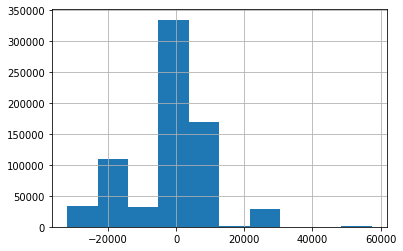

In [40]:
train_image_info.mean_pixel.hist()

<AxesSubplot:>

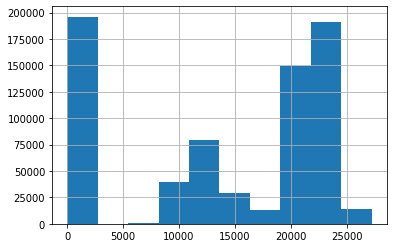

In [41]:
train_image_info.std_pixel.hist()

<AxesSubplot:>

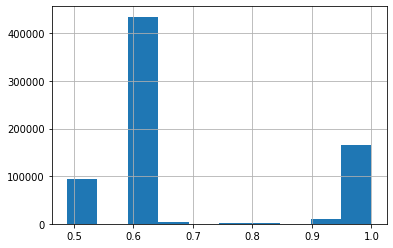

In [42]:
train_image_info.slice_thickness.hist()

In [43]:
dimage, img = utils.show_dcm_image('train_images/1.2.826.0.1.3680043.10014/1.dcm')

In [44]:
dimage.ImagePositionPatient

[-48.6328, -54.25781, -486.00]

In [37]:
dimage, img = utils.show_dcm_image('train_images/1.2.826.0.1.3680043.10014/10.dcm')

In [39]:
dimage

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.10014.1.10
(0002, 0010) Transfer Syntax UID                 UI: JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.10014.1.10
(0008, 0023) Content Date                        DA: '20220727'
(0008, 0033) Content Time                        TM: '180850.369808'
(0010, 0010) Patient's Name                      PN: '10014'
(0010, 0020) Patient ID                          LO: '10014'
(0018, 0050) Slice Thickness                     DS: '1.0'
(

## References

* https://towardsdatascience.com/understanding-dicoms-835cd2e57d0b